#  IA para Redes de Suministro 

👤 **Autor:** John Leonardo Vargas Mesa  
🔗 [LinkedIn](https://www.linkedin.com/in/leonardovargas/) | [GitHub](https://github.com/LeStark)  

## 📂 Repositorio en GitHub  
- 📓 **Notebooks:** [Acceder aquí](https://github.com/LeStark/Cursos/tree/main/IA4SC)  
- 📑 **Data sets:** [Acceder aquí](https://github.com/LeStark/Cursos/tree/main/Data/SC)  
---

# 📘 Notebook 2 – Aprendizaje No Supervisado en Cadenas de Suministro

En este notebook continuaremos trabajando con el mismo dataset utilizado en el **Notebook 1** (evaluación de proveedores).  
Sin embargo, a diferencia del enfoque supervisado, aquí ocultaremos la variable categórica de respuesta y le pediremos a un algoritmo de aprendizaje no supervisado que agrupe a los proveedores en categorías basadas únicamente en los patrones detectados en los datos numéricos.  

Este enfoque nos permitirá explorar cómo el modelo puede descubrir estructuras y segmentos ocultos dentro de la información sin usar etiquetas previas.

### Estructura del Dataset

El dataset contiene variables asociadas a la evaluación de proveedores:

- **Tiempo_entrega_dias**: número promedio de días de entrega.  
- **Confiabilidad_entregas**: consistencia en despachos a tiempo.  
- **Costos_de_transacción**: costos administrativos y de gestión asociados.  
- **Defectos_por_millón**: nivel de calidad medido en defectos detectados.  

En este notebook no utilizaremos la columna `categoria_proveedor`, pues el objetivo es que el algoritmo genere sus propias categorías.

### 🎯 Objetivos del Notebook
- Aplicar un análisis exploratorio (EDA) enfocado en identificar patrones entre las variables.  
- Implementar algoritmos de clustering (ej. *K-Means*) para segmentar a los proveedores en grupos.  
- Comparar los grupos generados por el modelo con las categorías originales (ocultas) para evaluar la calidad de los clusters.  
- Visualizar los resultados y reflexionar sobre su aplicabilidad en la gestión de la cadena de suministro.  

### 🛠️ Herramientas a utilizar
- **pandas** y **numpy**: manipulación de datos.  
- **matplotlib** y **seaborn**: visualización de patrones y clusters.  
- **scikit-learn**: algoritmos de clustering y métricas de evaluación no supervisada.  

✅ Al finalizar este notebook, comprenderás cómo los métodos no supervisados pueden **descubrir estructuras y segmentar proveedores** sin necesidad de etiquetas previas, lo que resulta muy útil en escenarios donde la clasificación manual no está disponible.


In [ ]:
# Librerías principales para el proyecto

# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Utilidades matemáticas
import math

# Manejo de advertencias (para ocultar mensajes innecesarios)
import warnings
warnings.filterwarnings('ignore')

# Preprocesamiento de datos
from sklearn.preprocessing import StandardScaler  # Estandarización de variables numéricas
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score,        # Índice de Rand ajustado
    normalized_mutual_info_score,  # Información mutua normalizada
    v_measure_score             # V-Measure
)

# Guardado y carga de modelos entrenados
import joblib

In [ ]:
# 📥 Carga del Dataset de Evaluación de Proveedores
# ------------------------------------------------
# En esta celda cargamos un dataset adaptado del famoso Iris,
# pero reinterpretado en el contexto de cadenas de suministro.
#
# El archivo está almacenado en un repositorio de GitHub y lo
# leemos directamente con pandas usando pd.read_csv().
# Luego mostramos las primeras filas para confirmar que se cargó bien
# y entender la estructura de las variables.

url = "https://raw.githubusercontent.com/LeStark/Cursos/refs/heads/main/00%20-%20Data/02%20-%20SC/iris_evaluacion_proveedores.csv"
data = pd.read_csv(url)

data_unsupervised = data.drop(columns=['categoria_proveedor'])
data_unsupervised.info()
data_unsupervised.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tiempo_entrega_dias     150 non-null    float64
 1   Confiabilidad_entregas  150 non-null    float64
 2   Costos_de_transacción   150 non-null    float64
 3   Defectos_por_millón     150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,Tiempo_entrega_dias,Confiabilidad_entregas,Costos_de_transacción,Defectos_por_millón
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Análisis Exploratorio de Datos (EDA)

En esta celda realizamos un primer acercamiento a los datos antes de aplicar algoritmos de clustering.  
El objetivo es entender la distribución de las variables, detectar posibles valores atípicos y observar relaciones entre atributos.  

### 1️ Histogramas y distribuciones KDE
Se grafican histogramas de todas las variables numéricas del dataset.  
Esto nos permite:
- Identificar la forma de la distribución (simétrica, sesgada, multimodal).  
- Detectar concentraciones de valores o posibles rangos atípicos.  

### 2️ Boxplots para detectar outliers
Con los boxplots horizontales observamos la dispersión y presencia de valores extremos (*outliers*).  
Estos valores son importantes porque algoritmos como K-Means se basan en distancias, y los outliers pueden influir en la formación de clusters.  

### 3️ Matriz de correlación
La matriz de correlación muestra qué tan relacionadas están las variables entre sí:  
- Valores cercanos a **1** → correlación positiva fuerte.  
- Valores cercanos a **-1** → correlación negativa fuerte.  
- Valores cercanos a **0** → poca o ninguna relación.  



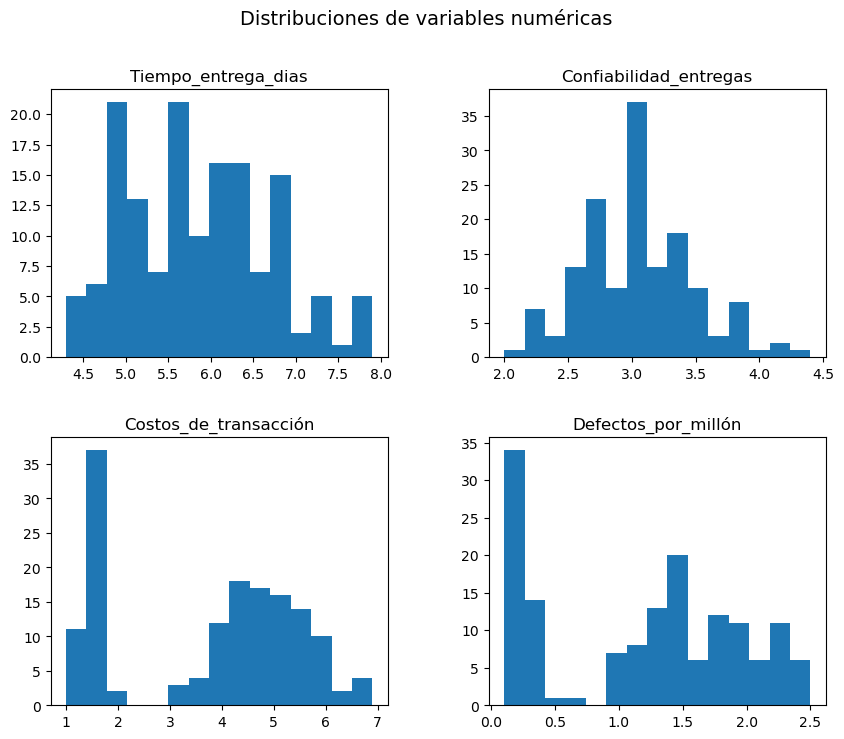

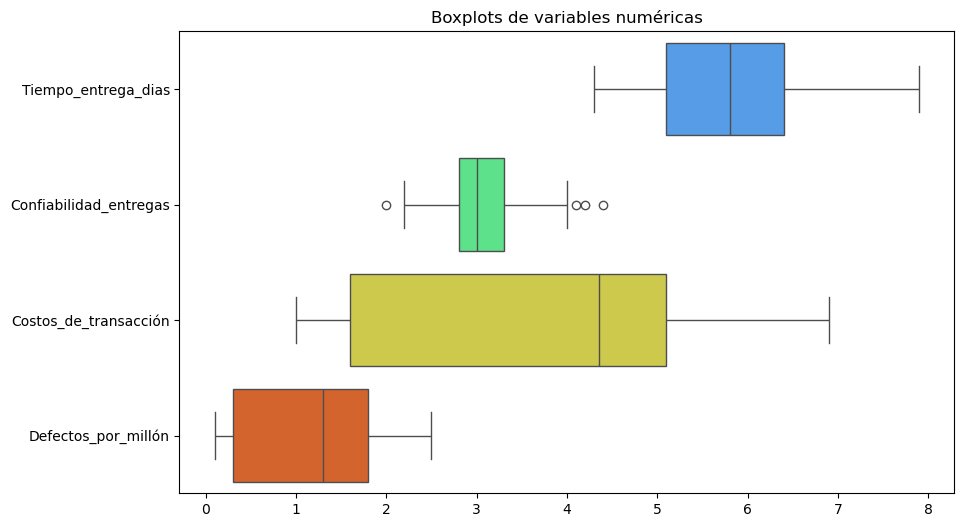

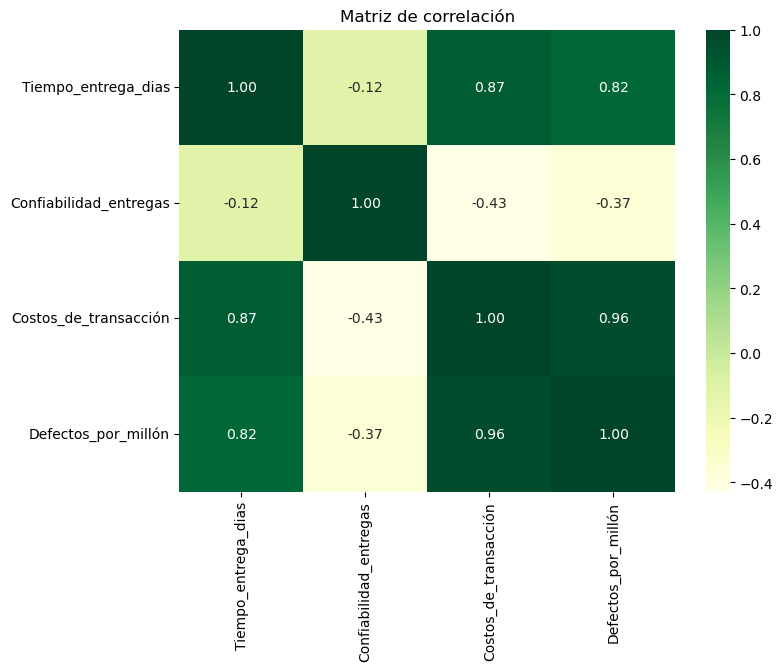

In [ ]:
# ============================
# 1️ Histogramas y distribuciones KDE
# ============================
data_unsupervised.hist(bins=15, figsize=(10,8), grid=False)
plt.suptitle("Distribuciones de variables numéricas", fontsize=14)
plt.show()

# ============================
# 2️ Boxplots para detectar outliers
# ============================
plt.figure(figsize=(10,6))
sns.boxplot(data=data_unsupervised, orient="h", palette="turbo")
plt.title("Boxplots de variables numéricas")
plt.show()

# ============================
# 3️ Matriz de correlación
# ============================
plt.figure(figsize=(8,6))
sns.heatmap(data_unsupervised.corr(), annot=True, cmap="YlGn", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


## Estandarización de variables

En esta celda aplicamos **StandardScaler** para transformar todas las variables numéricas de manera que tengan **media 0 y desviación estándar 1**.  
Este paso es esencial en algoritmos de clustering como **K-Means**, ya que se basan en distancias y es necesario que todas las variables aporten de forma equilibrada, sin que unas dominen sobre otras por su escala.  


In [ ]:

#  Seleccionamos los datos numéricos para aplicar aprendizaje no supervisado
X_unsupervised = data_unsupervised

#  Inicializamos el escalador
# StandardScaler transformará cada variable para que tenga media = 0 y desviación estándar = 1
scaler = StandardScaler()

#  Ajustamos el escalador a los datos y los transformamos
# Esto asegura que todas las variables estén en la misma escala y contribuyan de manera equilibrada
X_scaled = scaler.fit_transform(X_unsupervised)

#  Convertimos el resultado a DataFrame para mantener nombres de columnas y el mismo índice
X_scaled = pd.DataFrame(X_scaled, columns=X_unsupervised.columns, index=X_unsupervised.index)

# Revisamos las primeras filas del dataset escalado
print(X_scaled.head())



   Tiempo_entrega_dias  Confiabilidad_entregas  Costos_de_transacción  \
0            -0.900681                1.019004              -1.340227   
1            -1.143017               -0.131979              -1.340227   
2            -1.385353                0.328414              -1.397064   
3            -1.506521                0.098217              -1.283389   
4            -1.021849                1.249201              -1.340227   

   Defectos_por_millón   Cluster  
0            -1.315444  0.049049  
1            -1.315444  0.049049  
2            -1.315444  0.049049  
3            -1.315444  0.049049  
4            -1.315444  0.049049  


## Entrenamiento del modelo K-Means

En esta celda aplicamos el algoritmo **K-Means** para segmentar a los proveedores en grupos basados en patrones encontrados en los datos.  

###  Pasos realizados

1. **Inicialización del modelo**  
   Definimos `n_clusters=3` para que el algoritmo forme tres grupos.  
   - `random_state=42` asegura reproducibilidad.  
   - `n_init=10` indica que se probarán varias inicializaciones para elegir la mejor.  

2. **Entrenamiento del modelo**  
   Con `kmeans.fit(X_scaled)`, el algoritmo calcula los **centroides** y asigna cada observación a un cluster según su distancia al centro más cercano.  

3. **Obtención de etiquetas**  
   - `kmeans.labels_` devuelve el número de cluster asignado a cada observación.  
   - Cada proveedor recibe un valor 0, 1 o 2 según el grupo al que pertenezca.  

4. **Incorporación al dataset**  
   Se agrega una nueva columna llamada `Cluster` en `data_unsupervised`, que contiene la asignación de grupo para cada registro.  

De esta manera, cada proveedor queda clasificado en un cluster generado automáticamente por K-Means, lo que permite analizar patrones ocultos y comparar con las categorías originales si se desea.


In [ ]:

# 1. Inicializamos el modelo K-Means
# n_clusters=3 → pedimos que el algoritmo forme 3 grupos
# random_state=42 → garantiza reproducibilidad
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# 2. Entrenamos el modelo con los datos estandarizados
kmeans.fit(X_scaled)

# 3. Obtenemos las etiquetas (clusters asignados por K-Means)
clusters = kmeans.labels_

# 4. Agregamos los clusters al dataset para análisis posterior
data_unsupervised["Cluster"] = clusters

# Revisamos las primeras filas con la nueva columna
print(data_unsupervised.head())


  File "c:\Users\jlvar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\jlvar\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jlvar\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\jlvar\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


   Tiempo_entrega_dias  Confiabilidad_entregas  Costos_de_transacción  \
0                  5.1                     3.5                    1.4   
1                  4.9                     3.0                    1.4   
2                  4.7                     3.2                    1.3   
3                  4.6                     3.1                    1.5   
4                  5.0                     3.6                    1.4   

   Defectos_por_millón  Cluster  
0                  0.2        1  
1                  0.2        1  
2                  0.2        1  
3                  0.2        1  
4                  0.2        1  


##  Visualización de resultados

Una vez que el modelo K-Means ha asignado un cluster a cada proveedor, el siguiente paso es visualizar gráficamente los resultados.  

La visualización nos permite:  
- Entender mejor cómo se distribuyen los grupos en función de las variables.  
- Detectar solapamientos o separaciones claras entre clusters.  
- Facilitar la interpretación de los patrones que el algoritmo encontró en los datos.  

A continuación, generaremos diferentes gráficos para explorar y comprender la clasificación obtenida.


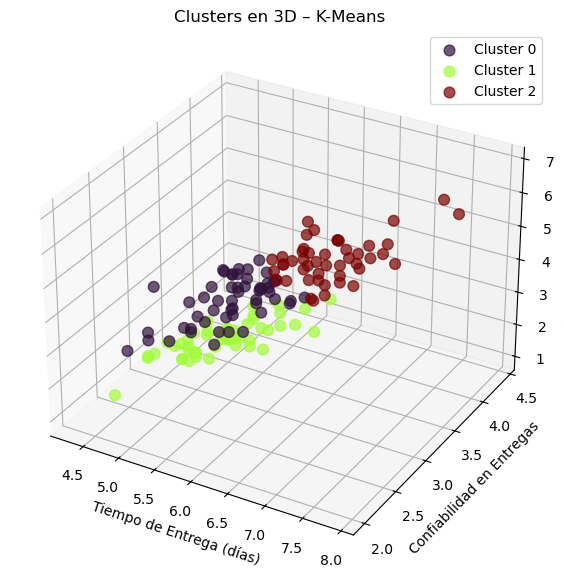

In [11]:
from mpl_toolkits.mplot3d import Axes3D  # necesario para proyección 3D

# 🎨 Definimos colores para cada cluster
colors = plt.cm.turbo(np.linspace(0, 1, len(data_unsupervised["Cluster"].unique())))

# 🔹 Creamos el gráfico 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

# 🔹 Dibujamos cada punto según su cluster
for cluster_id, color in zip(sorted(data_unsupervised["Cluster"].unique()), colors):
    subset = data_unsupervised[data_unsupervised["Cluster"] == cluster_id]
    ax.scatter(
        subset["Tiempo_entrega_dias"],
        subset["Confiabilidad_entregas"],
        subset["Costos_de_transacción"],
        s=60, alpha=0.7, c=[color], label=f"Cluster {cluster_id}"
    )

# 🎯 Etiquetas de los ejes
ax.set_xlabel("Tiempo de Entrega (días)")
ax.set_ylabel("Confiabilidad en Entregas")
ax.set_zlabel("Costos de Transacción")
ax.set_title("Clusters en 3D – K-Means")

# Leyenda
ax.legend()
plt.show()


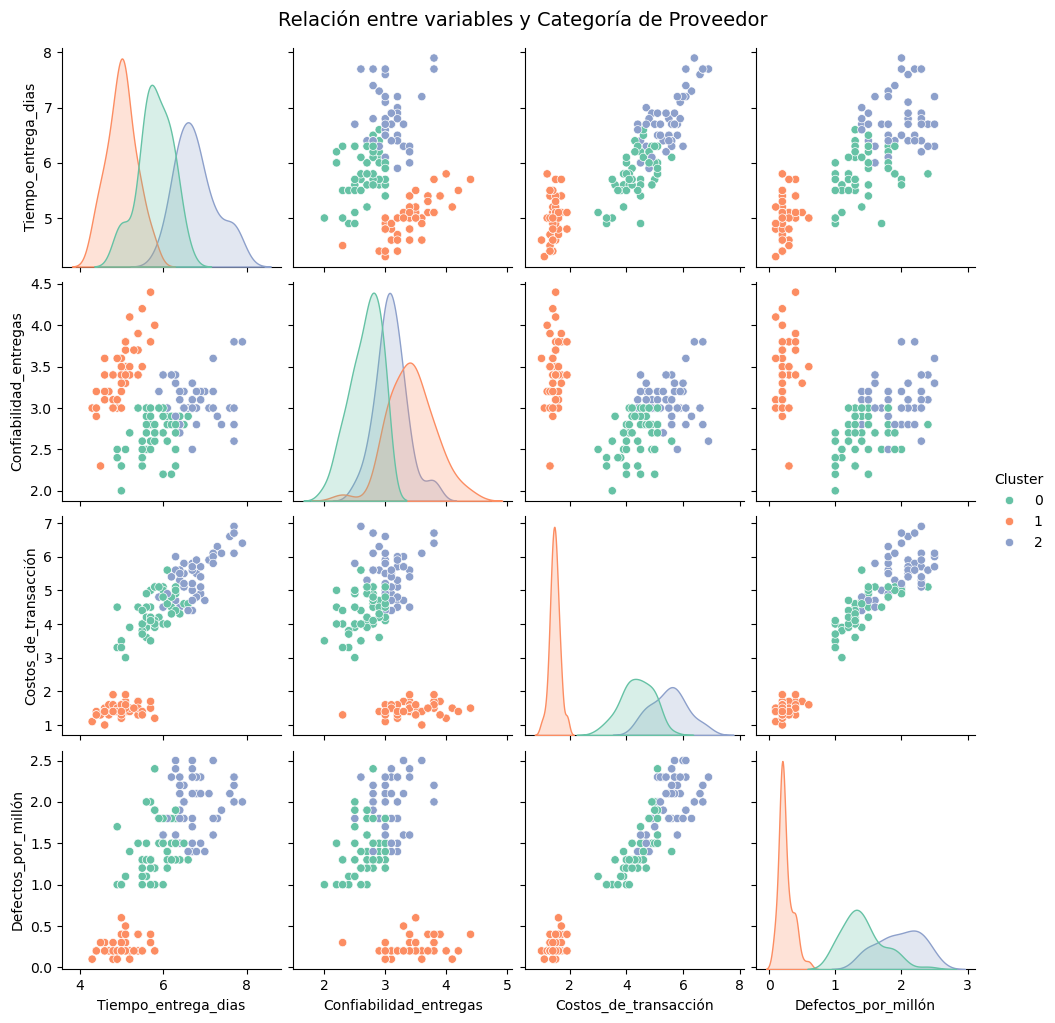

In [13]:

# Pairplot con densidades KDE en la diagonal
sns.pairplot(
    data_unsupervised, 
    vars=data_unsupervised.columns[:-1],
    hue="Cluster", 
    diag_kind="kde", 
    palette="Set2",
    #corner=True
)

plt.suptitle("Relación entre variables y Categoría de Proveedor", y=1.02, fontsize=14)
plt.show()

In [12]:
import plotly.express as px

# 🎨 Creamos un scatter 3D interactivo
fig = px.scatter_3d(
    data_unsupervised,
    x="Tiempo_entrega_dias",
    y="Confiabilidad_entregas",
    z="Costos_de_transacción",
    color="Cluster",  # coloreado por el cluster asignado
    symbol="Cluster",
    size_max=10,
    opacity=0.7,
    title="Visualización 3D interactiva de Clusters – K-Means"
)

# Mostrar el gráfico
fig.show()


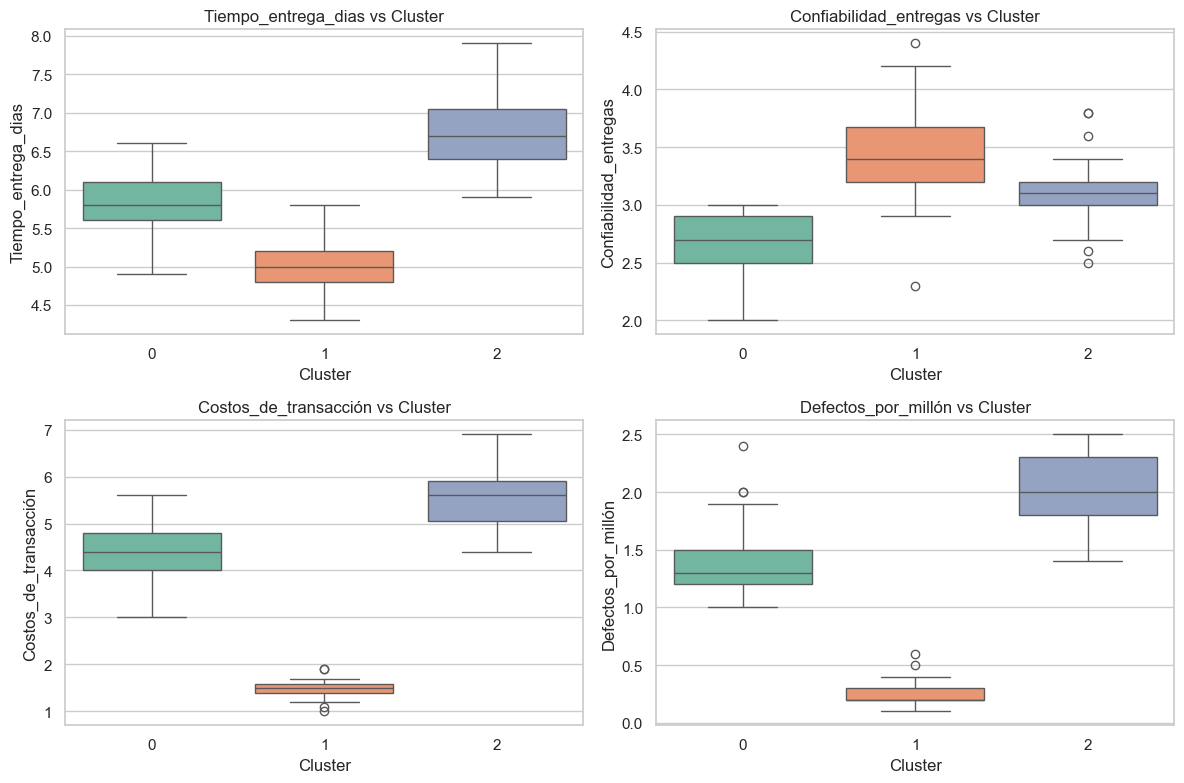

In [17]:
# Configuración de estilo
sns.set(style="whitegrid")

# Variables numéricas
variables = data_unsupervised.columns.to_list()
variables.remove("Cluster")

# Crear grid de 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Iterar sobre las variables y ejes
for var, ax in zip(variables, axes.flatten()):
    sns.boxplot(data=data_unsupervised, x="Cluster", y=var, ax=ax, palette="Set2")
    ax.set_title(f"{var} vs Cluster", fontsize=12)
    ax.set_xlabel("Cluster")
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()

##  Evaluación del clustering con etiquetas reales

Aunque el objetivo de **K-Means** es agrupar sin necesidad de etiquetas, en este caso contamos con la columna `categoria_proveedor`, lo que nos permite comparar los clusters encontrados con las categorías originales.  

### Pasos realizados

1. **Creación del DataFrame de evaluación**  
   Se genera `Data_evaluacion`, que contiene los datos originales, la columna de clusters (`Cluster`) y la etiqueta real (`categoria_proveedor`).  

2. **Definición de variables**  
   - `y_true`: categorías reales de los proveedores.  
   - `y_pred`: clusters asignados por K-Means.  

3. **Cálculo de métricas externas**  
   - **Adjusted Rand Index (ARI):** mide similitud entre clustering y etiquetas reales, ajustado por azar (1 = perfecta coincidencia, 0 = aleatorio).  
   - **Normalized Mutual Information (NMI):** mide la información compartida entre etiquetas y clusters (1 = máxima correspondencia).  
   - **V-Measure:** balance entre homogeneidad (cada cluster contiene solo una clase) y completitud (todos los miembros de una clase están en el mismo cluster).  




In [ ]:

# 1. Creamos el nuevo DataFrame de evaluación
Data_evaluacion = data_unsupervised.copy()
Data_evaluacion["categoria_proveedor"] = data["categoria_proveedor"]

# 2. Variables para comparar
y_true = Data_evaluacion["categoria_proveedor"]   # etiquetas reales
y_pred = Data_evaluacion["Cluster"]              # clusters asignados por K-Means

# 3. Cálculo de métricas
ari = adjusted_rand_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
vmeasure = v_measure_score(y_true, y_pred)

# 4. Resultados
print(" Evaluación de Clustering con etiquetas reales:")
print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")
print(f"V-Measure: {vmeasure:.3f}")

# ✅ Revisamos el DataFrame resultante
Data_evaluacion.head()


 Evaluación de Clustering con etiquetas reales:
Adjusted Rand Index (ARI): 0.620
Normalized Mutual Information (NMI): 0.659
V-Measure: 0.659


,Tiempo_entrega_dias,Confiabilidad_entregas,Costos_de_transacción,Defectos_por_millón,Cluster,categoria_proveedor
0,5.1,3.5,1.4,0.2,1,Proveedor Estratégico
1,4.9,3.0,1.4,0.2,1,Proveedor Estratégico
2,4.7,3.2,1.3,0.2,1,Proveedor Estratégico
3,4.6,3.1,1.5,0.2,1,Proveedor Estratégico
4,5.0,3.6,1.4,0.2,1,Proveedor Estratégico


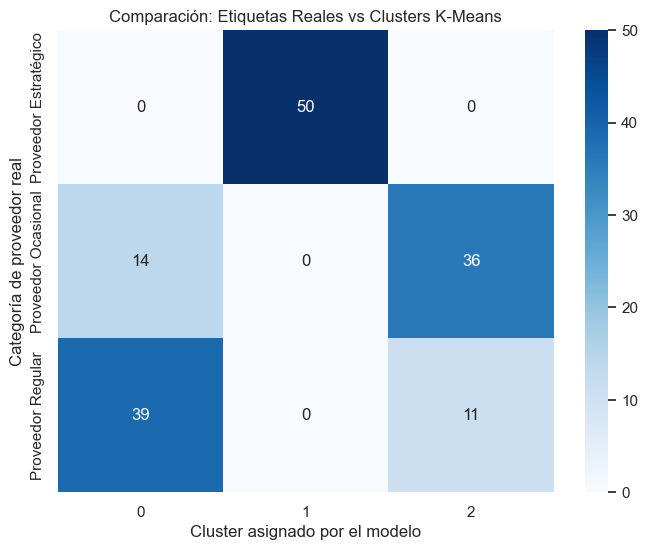

In [ ]:


#  Matriz de contingencia: relación entre etiquetas reales y clusters
contingencia = pd.crosstab(Data_evaluacion["categoria_proveedor"], Data_evaluacion["Cluster"])

# 📊 Heatmap para visualizar
plt.figure(figsize=(8,6))
sns.heatmap(contingencia, annot=True, fmt="d", cmap="Blues")

plt.title("Comparación: Etiquetas Reales vs Clusters K-Means")
plt.xlabel("Cluster asignado por el modelo")
plt.ylabel("Categoría de proveedor real")
plt.show()
